# Data Mining Tutorial Week 11

In this tutorial, we will learn how to use four well-implemented calssifiers in sklearn:  **(1) Decision Tree**, **(2) Naive Bayes**, **(3) KNN** and **(4) Random Forest**, based on the iris flower dataset. 

## Iris Flower Data Set Example

The Iris Flower data set is a well-known dataset for teaching machine learning techniques. The data set consists of 50 samples from each of **three** species of Iris (Iris setosa, Iris virginica and Iris versicolor). **Four** features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, we will use different classification models to distinguish the species from each other. 

### Data preparation

In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [2]:
# Load data
df = pd.read_csv('iris.csv')
df.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# The dimension of the dataset  
df.shape

(150, 5)

In [4]:
# Split the dataset into X and y for classification
# Select the last column as label
y = df['Species'].values
# Select column 0~3 as features
X = df.iloc[:,0:4].values

In [5]:
# Split the dataset into train and test set (default train/test is set as 75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("The number of training data: ", X_train.shape[0], "\nThe number of test data: ",X_test.shape[0])

The number of training data:  112 
The number of test data:  38


### Part 1. Decision Tree
For details of constructing decision tree in sklearn, please refer to https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier 

However, scikit-learn implementation of decision tree/random forest **does not support non-numerical variables**. 

In [6]:
# Construct the decision tree
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1)  # Try criterion = 'entropy' afterclass!
# Fit the decision tree with the dataset
clf = clf.fit(X_train, y_train)

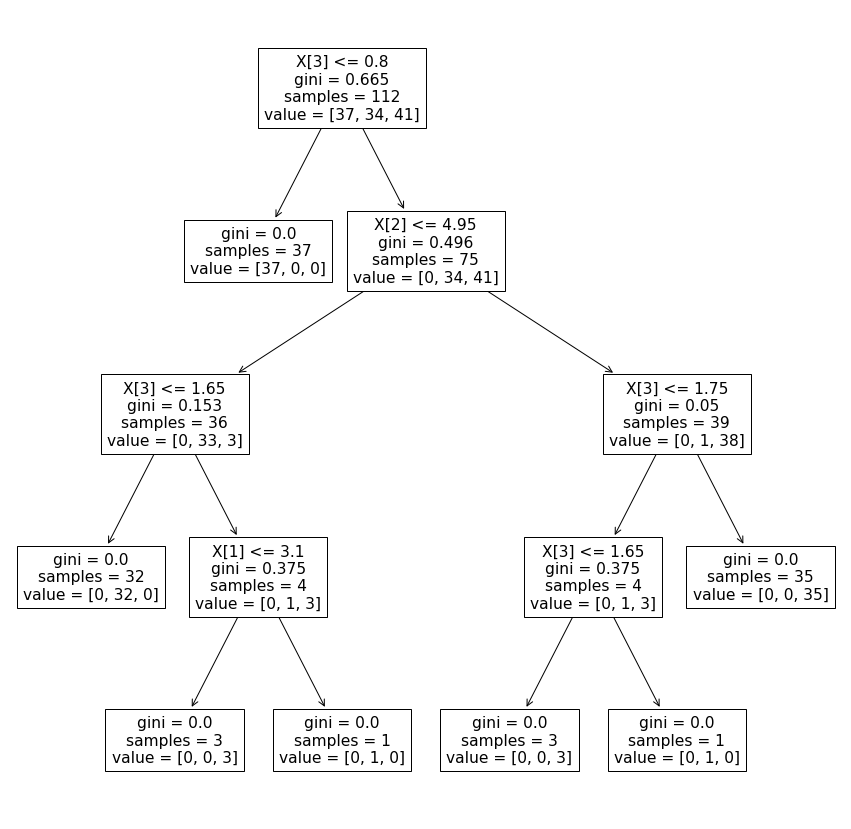

In [8]:
# Visualize the result
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15))
tree.plot_tree(clf) 
plt.show()

The tree above is not interpretable, we cannot tell which class the leaf belongs to, and what exactly $X[0]$, $X[1]$... represent. Thus, we can make the tree more interpretable by adding in feature and class names. Please refer to https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html for more information.

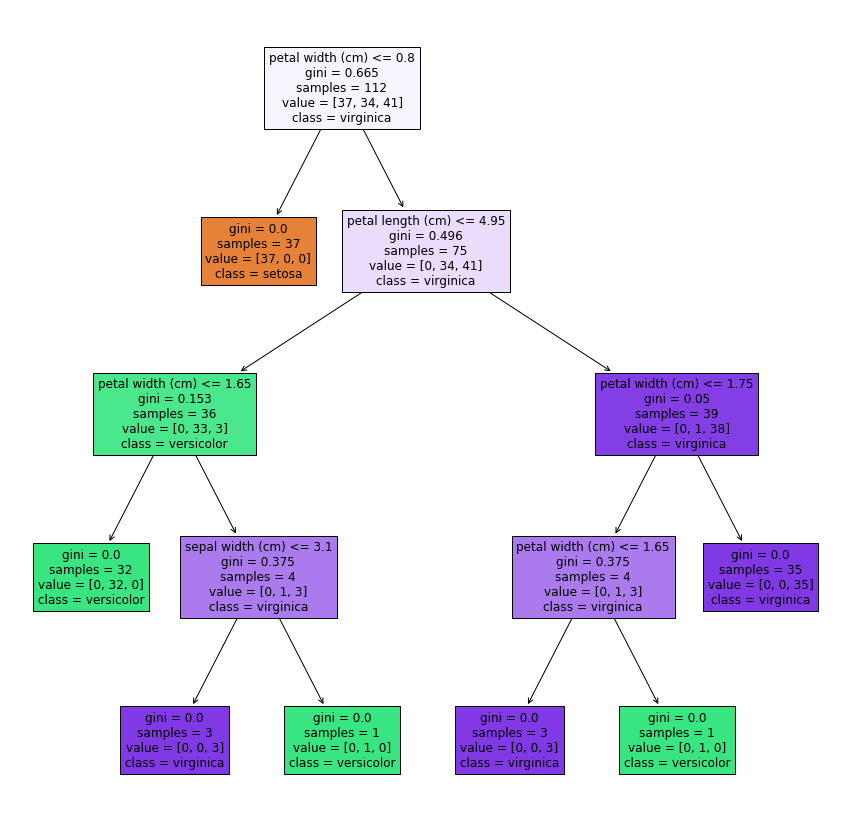

In [10]:
# Define the figure names
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
# Define the class/label names
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15))
# Setting filled = True to paint nodes to indicate majority class for classification: darker -> purer 
tree.plot_tree(clf, feature_names = fn, class_names=cn, filled = True)
plt.show()

In [11]:
# We can also export the text discription of the tree
print(tree.export_text(clf, feature_names=fn))

|--- petal width (cm) <= 0.80
|   |--- class: setosa
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.95
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: versicolor
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: versicolor
|   |--- petal length (cm) >  4.95
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: virginica
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: versicolor
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: virginica



In [16]:
# Get the prediction of test data
y_pred = clf.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Get the accuracy from the table
acc1 = metrics.classification_report(y_test, y_pred, output_dict=True)['accuracy']
print("The prediction accuracy is: ", acc1)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
The prediction accuracy is:  0.9736842105263158
Number of mislabeled points out of a total 38 points : 1


The support is the number of occurrences of each class in **y_test** (ground truth). 

The reported averages of precision, recall and f1 score include macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label), please see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support for more details on averages. 

As we can see from the confusion matrix, the elements that lie on the diagonal ([13,15,9]) indicates the number of correctly classified instances for each category. Given the element outside the diagonal is 1, there is only one misclassification for the test set, which misclassified a 'versicolor' as 'virginica'. The summary report shows that overall accuracy is 0.97, and all 'setosa's has been correctly classified. 

### Part 2. Naive Bayes
**Bayes’ theorem**: given class variable $y$ and dependent feature vector $x_1$ through $x_n$, we have

\begin{equation*}
P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)} {P(x_1, \dots, x_n)} 
\end{equation*}

As $P(x_1, x_2,..., x_n)$ is constant, the relationship is simplified to

 \begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)\end{aligned}\end{align} 
 
For GaussianNB (Gaussian Naive Bayes), the likelihood of the features is assumed to be Gaussian:
\begin{align}\begin{aligned}P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)\end{aligned}\end{align} 

For more details about GaussianNB, please refer to https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

In [17]:
# Construct the GaussianNB model
gnb = GaussianNB()
# make predictions
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

acc2 = metrics.classification_report(y_test, y_pred, output_dict=True)['accuracy']
print("The prediction accuracy is: ", acc2)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
The prediction accuracy is:  1.0
Number of mislabeled points out of a total 38 points : 0


As we can see from the confusion matrix, all instances in the test dataset have been correctly classified. 

### Part 3. KNN
The k-Nearest Neighbors algorithm can be broken down into 3 steps:

Step 1: Calculate Distance (i.e. Euclidean Distance/ manhattan distance...).<br>
Step 2: Get k Nearest Neighbors.<br>
Step 3: Make Predictions based on the nearest neighbors (i.e. majority voting).<br>

For more details in sklearn, please refer to https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [18]:
# Construct the knn model with k=1
neigh = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
# Fit then model and make the prediction of X
y_pred = neigh.fit(X_train,y_train).predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

acc3 = metrics.classification_report(y_test, y_pred, output_dict=True)['accuracy']
print("The prediction accuracy is: ", acc3)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
The prediction accuracy is:  0.9736842105263158
Number of mislabeled points out of a total 38 points : 1


In [13]:
# Construct the knn model with k=3
neigh = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
# Fit then model and make the prediction of X
y_pred = neigh.fit(X_train,y_train).predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Number of mislabeled points out of a total 38 points : 1


In [14]:
# Construct the knn model with k=5
neigh = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
# Fit then model and make the prediction of X
y_pred = neigh.fit(X_train,y_train).predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Number of mislabeled points out of a total 38 points : 1


Text(0, 0.5, 'accuracy')

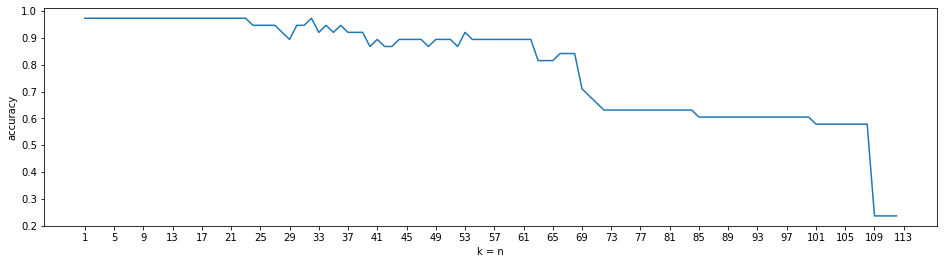

In [15]:
# Just to filter the warning messages for a clear output
import warnings
warnings.filterwarnings('ignore')

# Get the plot of accuracy change based on different k value (k=1, 2, 3, ..., 10)
acc_list = []
for k in range (1,113):
    neigh = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    y_pred = neigh.fit(X_train,y_train).predict(X_test)
    # Export the summary report as dictionary, and get the value of accuracy
    acc = metrics.classification_report(y_test, y_pred, output_dict=True)['accuracy']
    acc_list.append(acc)


# Plot the value of accuracy against different k
plt.figure(figsize=(16, 4))
plt.plot(range(1,113), acc_list)
plt.xticks(np.arange(1, 114, step=4))
plt.xlabel('k = n')
plt.ylabel('accuracy')



In [16]:
# Investigate in the training and test data and prove the accuracy around 0.25 when k = 112
iris_train, counts_train = np.unique(y_train, return_counts=True)
# Find the species with highest proportion in the training set
species = iris_train[np.argmax(counts_train/112)]
print(species, "is the most frequent species in the training set")
# Find how many the species exists in the test set
prop = np.count_nonzero(y_test == species)/38
print("The proportion of", species, "in test set: ", prop)

virginica is the most frequent species in the training set
The proportion of virginica in test set:  0.23684210526315788


As we can see from the plot, from k = 1 to k = 22, the accuracy stablized at 0.97, but the accuracy will rapidly decrease to around 0.25 if the k value keep increasing until 112. This is becuase we have 112 training instances, and the number of nearest neighbours must be less than or equal to 112. So, if we set k=112, the result of prediction always depends on the number of species which has the highest proportion (proportion of virginica  = 0.237) in the training set (based on majority vote).

### Part 4. Random Forest
Put it simple: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. 

For more details of RF in sklearn, please refer to https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [17]:
# Construct the RF model: n_estimators (10~100) controls the number of trees in the forest. 
rf = RandomForestClassifier(n_estimators=100,random_state=1)
y_pred = rf.fit(X_train,y_train).predict(X_test)

In [18]:
# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

acc4 = metrics.classification_report(y_test, y_pred, output_dict=True)['accuracy']
print("The prediction accuracy is: ", acc4)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
The prediction accuracy is:  0.9736842105263158
Number of mislabeled points out of a total 38 points : 1


**Feature importance**: When training a tree, it can be computed how much each feature decreases the weighted impurity in a tree. For a forest, the impurity decrease from each feature can be averaged and the features are ranked according to this measure.

In [19]:
# Find feature importance
feature_imp = pd.Series(clf.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

petal width (cm)     0.580576
petal length (cm)    0.399275
sepal width (cm)     0.020149
sepal length (cm)    0.000000
dtype: float64

<BarContainer object of 4 artists>

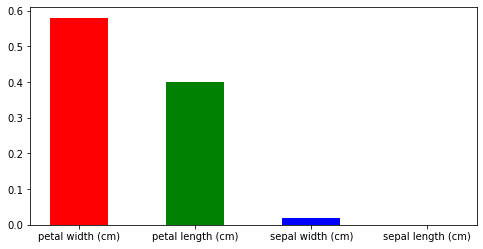

In [20]:
# Visualise the feature importance
plt.figure(figsize=(8, 4)) 
plt.bar(feature_imp.index, feature_imp, width = 0.5, color = ['red', 'green', 'blue', 'cyan'])

### Summary

In [22]:
# Construct the summary table
models = ['decision tree', 'naive bayes', 'knn', 'random forest']
accs = [acc1,acc2,acc3,acc4]
summary = pd.DataFrame({'models':models, 'accuracy':accs})
summary

,models,accuracy
0,decision tree,0.973684
1,naive bayes,1.000000
2,knn,0.973684
3,random forest,0.973684


We split the data into training (112 instances) set and test(38 instances) set, fit the model by the training set and evaluate the model by 38 test data. From the result of confusion matrix, we can conclude that decision tree, knn (with k = 1 ~ 22) and random forest have accuracy around 0.97 on predicting the iris species, while Naive Bayes gives a better result with accuracy = 1.0 for the test set. 